In [1]:
import string
import re
import os
import math
import statistics
import pickle
import copy
import numpy
import matplotlib.pyplot as plt
import bz2
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.manifold import TSNE
lemmatizer = WordNetLemmatizer()
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

In [2]:
files = []
directory = r'20_newsgroups\\'
for entry in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, entry)):
        files.append(entry)

docs = []
directory = r'20_newsgroups\\'
all_doc_ids = []
dict_folder_docs = {}

for fol in files:
    temp_dir = os.path.join(directory, fol)
    complete_doc_loc = []
    for entry in os.listdir(temp_dir):
        if os.path.isfile(os.path.join(temp_dir, entry)):
            doc_loc = os.path.join(fol, entry)
            complete_doc_loc.append(doc_loc)

    all_doc_ids.extend(complete_doc_loc)
    dict_folder_docs[fol] = complete_doc_loc

In [3]:
Picklefile1 = bz2.open('data_vectors', 'rb')
dict_matrix_vectors = pickle.load(Picklefile1)

Picklefile2 = open('dictionary_nt', 'rb')
dict_nt = pickle.load(Picklefile2)

# list_val_nt = [dict_nt[z] for z in dict_nt]
# max_nt = max(list_val_nt)

In [4]:
Picklefile3 = open('data_vocabulary', 'rb')
list_vocab_words = pickle.load(Picklefile3)
count_vocab = len(list_vocab_words)
count_docs_all = len(all_doc_ids)

In [7]:
# print(len(dict_matrix_vectors[0]))
print(count_vocab)
# print(max_nt)
# print(files)
# print(all_doc_ids)
# for k in all_doc_ids:
#     print(k)

41839


In [8]:
print("Enter the value of k")
value_k = int(input())
value_alpha = 1
value_beta = 0.75
value_gamma = 0.25

Enter the value of k
100


In [17]:
def do_preproceesing(text):
    text = text.lower()
    text = re.sub(r'[a-zA-Z]+[0-9]+', '', text)
    text = re.sub(r'[0-9]+[a-zA-Z]+', '', text)
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))  # map punctuation to space
    text = text.translate(translator)
    word_tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    text = [word for word in word_tokens if word not in stop_words]
    query_tokens = [ps.stem(word) for word in text]
    return query_tokens

def make_vector_log(tokens_query):
    q_vector = numpy.zeros(count_vocab)
    word_counts_query = Counter(tokens_query)
    for i in range(count_vocab):
        curr_wd = list_vocab_words[i]
        val_tf_log = math.log10(1 + word_counts_query[curr_wd])
        idf_val = math.log10(count_docs_all / (1 + dict_nt[curr_wd]))
        prod = val_tf_log * idf_val
        q_vector[i] = prod
    return q_vector

def find_similarity(query_vector):
    norm_q_vector = numpy.linalg.norm(query_vector)
    list_cosine_sim = []
    for dc in range(len(all_doc_ids)):
        curr_doc_name = all_doc_ids[dc]
        doc_vector = dict_matrix_vectors[curr_doc_name]
        doc_numpy_vector = numpy.array(doc_vector)
        norm_doc_vector = numpy.linalg.norm(doc_numpy_vector)
        cosine_sim = (numpy.dot(query_vector, doc_numpy_vector)) / (norm_q_vector * norm_doc_vector)
        list_cosine_sim.append([all_doc_ids[dc] ,cosine_sim])
    return list_cosine_sim

#Now running the multiple iterations till the user wants to quit

def plot_PR_curve(query_no):
    count_relevant = 0
    list_precision = []
    list_recall = []
    global list_relevant
    global list_non_relevant
    global list_map_value
    list_precision_values = []
    for f in range(value_k):
        curr_doc = list_cosine_scores[f][0]
        if dict_ground_docs.get(curr_doc) is not None:
            count_relevant += 1
        value_precision = count_relevant / (f+1)
        value_recall = count_relevant / total_relevant
        list_precision.append(value_precision)
        list_recall.append(value_recall)
        if dict_ground_docs.get(curr_doc) is not None:
            list_precision_values.append(value_precision)
        
    if len(list_precision_values) == 0:
        list_map_value[query_no].append(0)
    else:
        list_map_value[query_no].append(statistics.mean(list_precision_values))
    
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(8,8))

    plt.plot(list_recall, list_precision, )
    plt.xlabel('Recall', fontsize = 14)
    plt.ylabel('Precision', fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

def plot_TSNE(vectors_queries):
    np_TSN_query = numpy.array(vectors_queries)
    array_2D = TSNE(n_components=2).fit_transform(np_TSN_query)
    list_colours = ["red", "green", "blue", "yellow", "black"]
    list_markers = ["+", "*", "^", "X", "d"]
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(7, 7))
    for r in range(len(array_2D)):
        curr_cord = array_2D[r]
        string_iter = "iteration" + str(r)
        plt.scatter(curr_cord[0], curr_cord[1], label= string_iter, color= list_colours[r],  marker= list_markers[r], s=40) 
    
    plt.xlabel('X-axis', fontsize = 14)
    plt.ylabel('Y-axis', fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend() 
    plt.show()

In [18]:
print("How many queries you want to enter:")
count_queries = int(input())
list_map_value = [[] for kh in range(count_queries)]

How many queries you want to enter:
3


Enter the initial Query1
Pretty good opinions on biochemistry machines

Enter the ground truth folder for Query1:
Enter 1 for comp.graphics
Enter 2 for rec.sport.hockey
Enter 3 for sci.med
Enter 4 for sci.space
Enter 5 for talk.politics.misc
3


C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


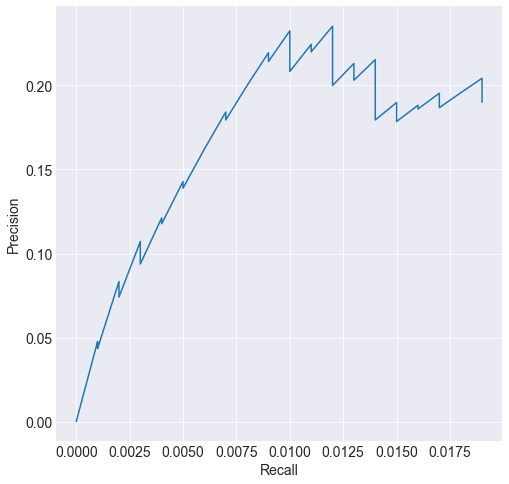

Enter the value of p in p% to be marked as relevant
10
The top 100 documents for initial query are:
1. rec.sport.hockey\53848
2. comp.graphics\38943
3. comp.graphics\38588
4. comp.graphics\37952
5. comp.graphics\38330
6. comp.graphics\38217
7. comp.graphics\38262
8. comp.graphics\38218
9. comp.graphics\38227
10. comp.graphics\37960
11. comp.graphics\37955
12. comp.graphics\37261
13. comp.graphics\37928
14. comp.graphics\37932
15. comp.graphics\37936
16. comp.graphics\37939
17. comp.graphics\37940
18. rec.sport.hockey\54242
19. rec.sport.hockey\53588
20. rec.sport.hockey\53687
21. sci.med\58758*
22. comp.graphics\37943
23. rec.sport.hockey\54098
24. sci.med\58819*
25. rec.sport.hockey\53720
26. rec.sport.hockey\53576
27. rec.sport.hockey\53827
28. sci.med\58979*
29. rec.sport.hockey\54032
30. rec.sport.hockey\53998
31. rec.sport.hockey\53791
32. comp.graphics\39018
33. sci.med\58155*
34. rec.sport.hockey\53935
35. sci.med\58146*
36. rec.sport.hockey\53564
37. sci.med\59025*
38. sci.med\

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


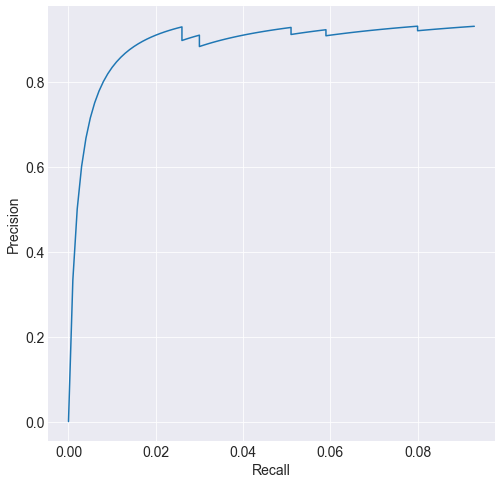

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
1
Enter the value of p in p% to be marked as relevant
10
The top 100 documents after 1 iteration are:
1. comp.graphics\37928
2. comp.graphics\37940
3. sci.med\58155
4. sci.med\58123*
5. sci.med\58758
6. sci.med\58146
7. sci.med\59062
8. sci.med\58819
9. sci.med\59025
10. sci.med\59138*
11. sci.med\58119*
12. sci.med\59108*
13. sci.med\58802
14. sci.med\58979
15. sci.med\59042
16. sci.med\59429*
17. sci.med\59011*
18. sci.med\58972*
19. sci.med\58840*
20. sci.med\58820*
21. sci.med\59183*
22. sci.med\58087
23. sci.med\58143
24. sci.med\59078
25. sci.med\59096
26. sci.med\59194
27. sci.med\59338
28. sci.med\58108
29. talk.politics.misc\178786
30. sci.med\59333
31. sci.med\59228
32. sci.med\59261
33. sci.med\59106
34. talk.politics.misc\178876
35. sci.med\58904
36. sci.med\58807
37. sci.med\58838
38. sci.med\58129
39. sci.med\58114
40. sci.med\59237
41. sci.med\58097
42. sci.med\59165
43. sci.med\58096
44. sci.med\5

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


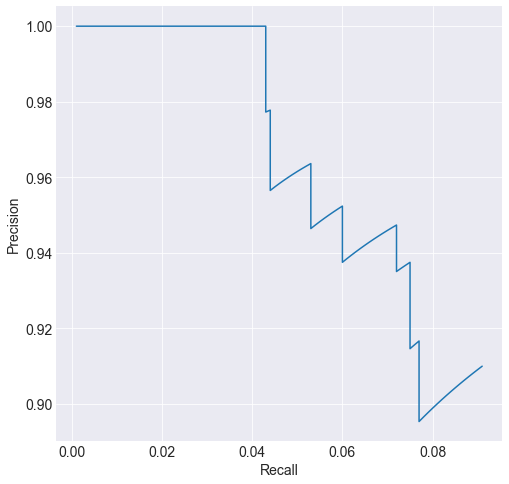

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
1
Enter the value of p in p% to be marked as relevant
10
The top 100 documents after 2 iteration are:
1. sci.med\59183
2. sci.med\58155
3. sci.med\59165*
4. sci.med\58123
5. sci.med\59138
6. sci.med\59025
7. sci.med\59062
8. sci.med\59108
9. sci.med\58972
10. sci.med\58820
11. sci.med\59011
12. sci.med\58146
13. sci.med\59034*
14. sci.med\58119
15. sci.med\59209*
16. sci.med\58819
17. sci.med\58758
18. sci.med\59338*
19. sci.med\59332*
20. sci.med\59527*
21. sci.med\59069*
22. sci.med\59049*
23. sci.med\59554*
24. sci.med\59333*
25. sci.med\59318
26. sci.med\59456
27. sci.med\59304
28. sci.med\59322
29. sci.med\59518
30. sci.med\58802
31. sci.med\59632
32. sci.med\58840
33. sci.med\59488
34. sci.med\59228
35. sci.med\59224
36. sci.med\59548
37. sci.med\58108
38. sci.med\59499
39. sci.med\59044
40. sci.med\59206
41. sci.med\59219
42. sci.med\59323
43. sci.med\59504
44. talk.politics.misc\178293
45. sci.med\59581
4

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


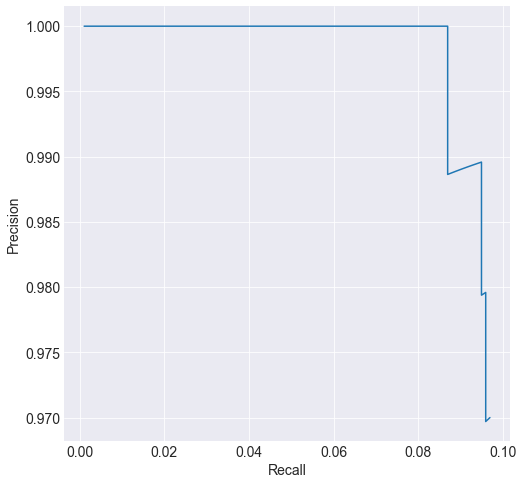

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
2
The top 100 documents after 3 iteration are:
1. sci.med\59039
2. sci.med\59039
3. sci.med\59039
4. sci.med\59039
5. sci.med\59039
6. sci.med\59039
7. sci.med\59039
8. sci.med\59039
9. sci.med\59039
10. sci.med\59039
11. sci.med\59039
12. sci.med\59039
13. sci.med\59039
14. sci.med\59039
15. sci.med\59039
16. sci.med\59039
17. sci.med\59039
18. sci.med\59039
19. sci.med\59039
20. sci.med\59039
21. sci.med\59039
22. sci.med\59039
23. sci.med\59039
24. sci.med\59039
25. sci.med\59039
26. sci.med\59039
27. sci.med\59039
28. sci.med\59039
29. sci.med\59039
30. sci.med\59039
31. sci.med\59039
32. sci.med\59039
33. sci.med\59039
34. sci.med\59039
35. sci.med\59039
36. sci.med\59039
37. sci.med\59039
38. sci.med\59039
39. sci.med\59039
40. sci.med\59039
41. sci.med\59039
42. sci.med\59039
43. sci.med\59039
44. sci.med\59039
45. sci.med\59039
46. sci.med\59039
47. sci.med\59039
48. sci.med\59039
49. sci.med\59039
50. sc

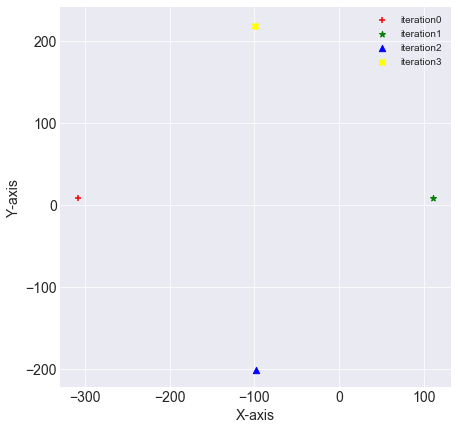

Enter the initial Query2
Scientific tools for preserving rights and body

Enter the ground truth folder for Query2:
Enter 1 for comp.graphics
Enter 2 for rec.sport.hockey
Enter 3 for sci.med
Enter 4 for sci.space
Enter 5 for talk.politics.misc
2


C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


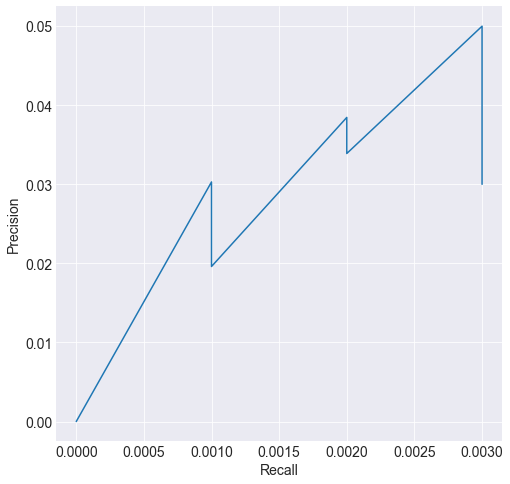

Enter the value of p in p% to be marked as relevant
10
The top 100 documents for initial query are:
1. comp.graphics\39655
2. comp.graphics\38409
3. comp.graphics\37919
4. comp.graphics\37920
5. comp.graphics\37914
6. comp.graphics\37261
7. comp.graphics\37913
8. comp.graphics\37915
9. comp.graphics\37916
10. comp.graphics\37917
11. comp.graphics\37918
12. comp.graphics\37921
13. comp.graphics\37923
14. comp.graphics\37925
15. comp.graphics\37927
16. comp.graphics\37928
17. comp.graphics\37931
18. comp.graphics\37922
19. comp.graphics\37924
20. comp.graphics\37926
21. comp.graphics\37929
22. comp.graphics\37930
23. comp.graphics\37932
24. comp.graphics\37940
25. comp.graphics\38272
26. comp.graphics\39736
27. comp.graphics\38484
28. comp.graphics\38912
29. comp.graphics\39055
30. comp.graphics\39065
31. comp.graphics\39021
32. comp.graphics\38311
33. rec.sport.hockey\53556*
34. comp.graphics\39074
35. comp.graphics\38916
36. comp.graphics\38223
37. comp.graphics\38928
38. comp.graphics

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


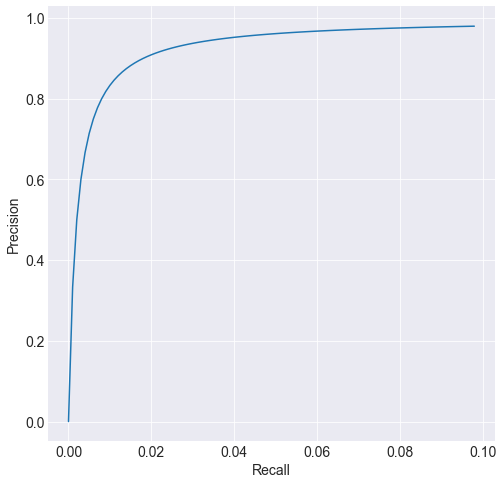

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
1
Enter the value of p in p% to be marked as relevant
10
The top 100 documents after 1 iteration are:
1. comp.graphics\37928
2. comp.graphics\37940
3. rec.sport.hockey\52647
4. rec.sport.hockey\53556
5. rec.sport.hockey\53685*
6. rec.sport.hockey\52645*
7. rec.sport.hockey\54232*
8. rec.sport.hockey\54041*
9. rec.sport.hockey\53555*
10. rec.sport.hockey\54242*
11. rec.sport.hockey\54742*
12. rec.sport.hockey\53588*
13. rec.sport.hockey\53931*
14. rec.sport.hockey\53686*
15. rec.sport.hockey\54723
16. rec.sport.hockey\53557
17. rec.sport.hockey\52637
18. rec.sport.hockey\53676
19. rec.sport.hockey\53576
20. rec.sport.hockey\53771
21. rec.sport.hockey\53827
22. rec.sport.hockey\53687
23. rec.sport.hockey\53571
24. rec.sport.hockey\53622
25. rec.sport.hockey\53591
26. rec.sport.hockey\54762
27. rec.sport.hockey\54058
28. rec.sport.hockey\53575
29. rec.sport.hockey\54773
30. rec.sport.hockey\54067
31. rec.sport.hocke

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


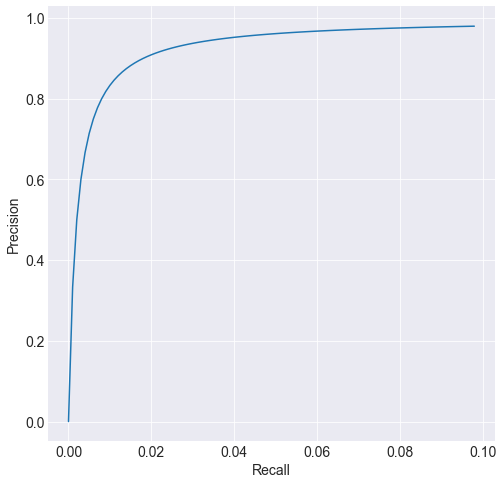

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
1
Enter the value of p in p% to be marked as relevant
10
The top 100 documents after 2 iteration are:
1. comp.graphics\37928
2. comp.graphics\37940
3. rec.sport.hockey\52647
4. rec.sport.hockey\53556
5. rec.sport.hockey\53685
6. rec.sport.hockey\54232
7. rec.sport.hockey\54041
8. rec.sport.hockey\52645
9. rec.sport.hockey\54242
10. rec.sport.hockey\53931
11. rec.sport.hockey\53588
12. rec.sport.hockey\53555
13. rec.sport.hockey\53686
14. rec.sport.hockey\54742
15. rec.sport.hockey\53591*
16. rec.sport.hockey\53576*
17. rec.sport.hockey\53687*
18. rec.sport.hockey\53932*
19. rec.sport.hockey\53575*
20. rec.sport.hockey\54253*
21. rec.sport.hockey\54061*
22. rec.sport.hockey\52637*
23. rec.sport.hockey\52638*
24. rec.sport.hockey\54252*
25. rec.sport.hockey\53652
26. rec.sport.hockey\53557
27. rec.sport.hockey\54299
28. rec.sport.hockey\53645
29. rec.sport.hockey\53618
30. rec.sport.hockey\53753
31. rec.sport.hocke

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


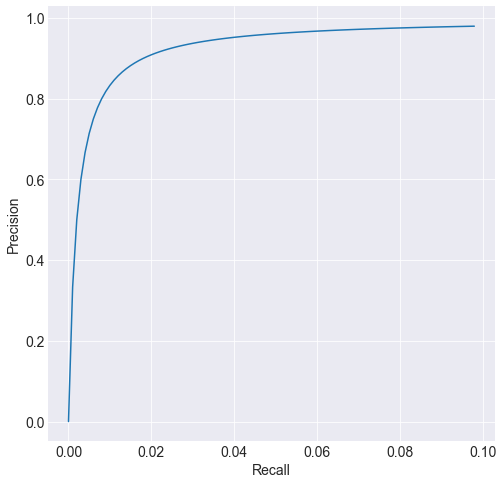

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
2
The top 100 documents after 3 iteration are:
1. rec.sport.hockey\53605
2. rec.sport.hockey\53605
3. rec.sport.hockey\53605
4. rec.sport.hockey\53605
5. rec.sport.hockey\53605
6. rec.sport.hockey\53605
7. rec.sport.hockey\53605
8. rec.sport.hockey\53605
9. rec.sport.hockey\53605
10. rec.sport.hockey\53605
11. rec.sport.hockey\53605
12. rec.sport.hockey\53605
13. rec.sport.hockey\53605
14. rec.sport.hockey\53605
15. rec.sport.hockey\53605
16. rec.sport.hockey\53605
17. rec.sport.hockey\53605
18. rec.sport.hockey\53605
19. rec.sport.hockey\53605
20. rec.sport.hockey\53605
21. rec.sport.hockey\53605
22. rec.sport.hockey\53605
23. rec.sport.hockey\53605
24. rec.sport.hockey\53605
25. rec.sport.hockey\53605
26. rec.sport.hockey\53605
27. rec.sport.hockey\53605
28. rec.sport.hockey\53605
29. rec.sport.hockey\53605
30. rec.sport.hockey\53605
31. rec.sport.hockey\53605
32. rec.sport.hockey\53605
33. rec.sport.hockey\536

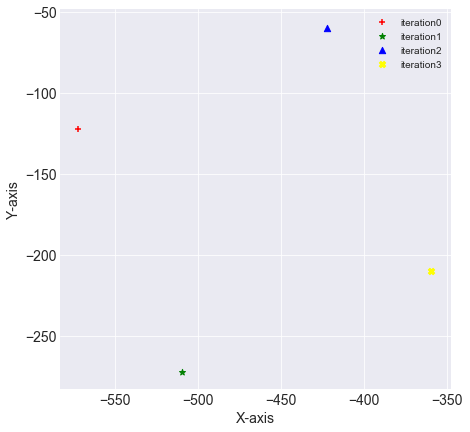

Enter the initial Query3
Frequently asked questions on State-of-the-art visualisation tools

Enter the ground truth folder for Query3:
Enter 1 for comp.graphics
Enter 2 for rec.sport.hockey
Enter 3 for sci.med
Enter 4 for sci.space
Enter 5 for talk.politics.misc
3


C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


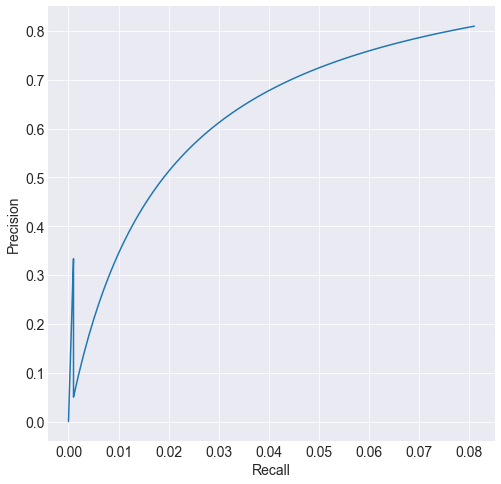

Enter the value of p in p% to be marked as relevant
10
The top 100 documents for initial query are:
1. comp.graphics\38951
2. comp.graphics\37919
3. sci.med\59410*
4. comp.graphics\37920
5. comp.graphics\37913
6. comp.graphics\37928
7. comp.graphics\37932
8. comp.graphics\37936
9. comp.graphics\37939
10. comp.graphics\37940
11. comp.graphics\38354
12. comp.graphics\38272
13. comp.graphics\38223
14. comp.graphics\37960
15. comp.graphics\38229
16. comp.graphics\37963
17. comp.graphics\38099
18. comp.graphics\38234
19. comp.graphics\38997
20. comp.graphics\39634
21. sci.med\59434*
22. sci.med\59331*
23. sci.med\59341*
24. sci.med\59318*
25. sci.med\59324*
26. sci.med\59444*
27. sci.med\59174*
28. sci.med\59401*
29. sci.med\59557*
30. sci.med\59587
31. sci.med\59137
32. sci.med\59547
33. sci.med\59422
34. sci.med\59582
35. sci.med\59598
36. sci.med\59221
37. sci.med\59430
38. sci.med\59090
39. sci.med\59332
40. sci.med\59295
41. sci.med\59493
42. sci.med\59481
43. sci.med\59166
44. sci.med

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


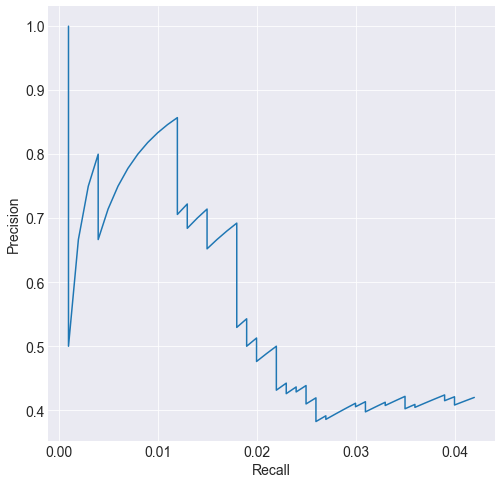

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
1
Enter the value of p in p% to be marked as relevant
10
The top 100 documents after 1 iteration are:
1. sci.med\59444
2. sci.space\61335
3. sci.med\59331
4. sci.med\59341
5. sci.med\59332*
6. sci.space\61385
7. sci.med\59333*
8. sci.med\59322*
9. sci.med\59324
10. sci.med\58088*
11. sci.med\58139*
12. sci.med\59044*
13. sci.med\58124*
14. sci.med\58917*
15. sci.space\61241
16. talk.politics.misc\178761
17. comp.graphics\37920
18. sci.med\58053*
19. comp.graphics\37919
20. sci.med\58052*
21. sci.med\58569
22. comp.graphics\38272
23. talk.politics.misc\178540
24. sci.med\58108
25. sci.med\58907
26. sci.med\59338
27. comp.graphics\38376
28. comp.graphics\38853
29. comp.graphics\38354
30. comp.graphics\38506
31. comp.graphics\38897
32. comp.graphics\38778
33. comp.graphics\38403
34. sci.space\60797
35. sci.med\58927
36. comp.graphics\39638
37. sci.space\61418
38. comp.graphics\39078
39. sci.med\59023
40. comp.graphi

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


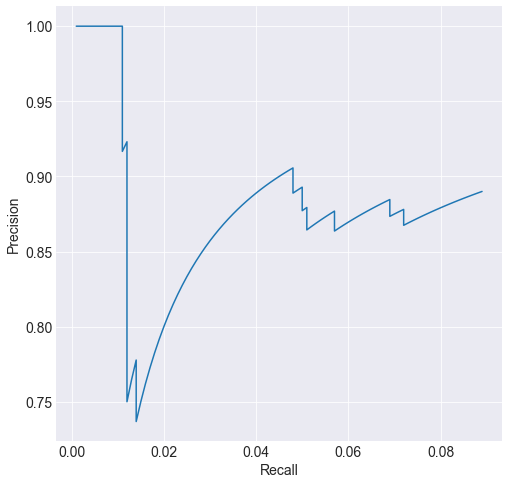

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
1
Enter the value of p in p% to be marked as relevant
10
The top 100 documents after 2 iteration are:
1. sci.med\59333
2. sci.med\59322
3. sci.med\59332
4. sci.med\59318
5. sci.med\59304*
6. sci.med\59044
7. sci.med\59341
8. sci.med\59444
9. sci.med\59338*
10. sci.med\59331
11. sci.med\58139
12. comp.graphics\37920
13. sci.med\58053
14. comp.graphics\37919
15. comp.graphics\37928
16. comp.graphics\37940
17. sci.med\58052
18. sci.med\59023*
19. sci.space\61335
20. sci.med\58917
21. sci.med\58124
22. sci.med\59034*
23. sci.med\59069*
24. sci.med\59049*
25. sci.med\59348*
26. sci.med\58088
27. sci.med\59323*
28. sci.med\58804*
29. sci.med\58907*
30. sci.med\58108
31. sci.med\59001
32. sci.med\58984
33. sci.med\58137
34. sci.med\58823
35. sci.med\58811
36. sci.med\58977
37. sci.med\58914
38. sci.med\58908
39. sci.med\58155
40. sci.med\58937
41. sci.med\58131
42. sci.med\58152
43. sci.med\59351
44. sci.med\58868
45. s

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


The PR curve is:


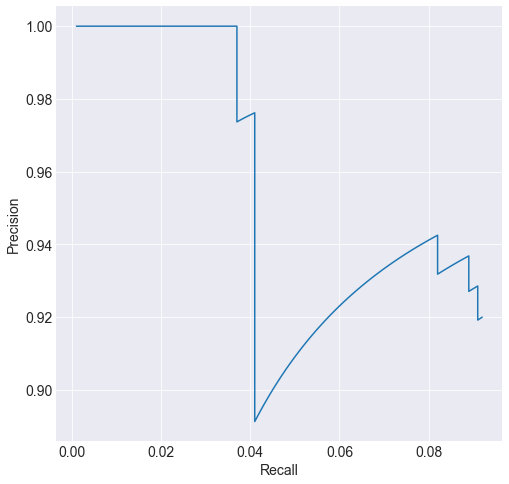

Enter 1 to continue feedback iterations and 2 to stop feedback iterations
2
The top 100 documents after 3 iteration are:
1. sci.med\58968
2. sci.med\58968
3. sci.med\58968
4. sci.med\58968
5. sci.med\58968
6. sci.med\58968
7. sci.med\58968
8. sci.med\58968
9. sci.med\58968
10. sci.med\58968
11. sci.med\58968
12. sci.med\58968
13. sci.med\58968
14. sci.med\58968
15. sci.med\58968
16. sci.med\58968
17. sci.med\58968
18. sci.med\58968
19. sci.med\58968
20. sci.med\58968
21. sci.med\58968
22. sci.med\58968
23. sci.med\58968
24. sci.med\58968
25. sci.med\58968
26. sci.med\58968
27. sci.med\58968
28. sci.med\58968
29. sci.med\58968
30. sci.med\58968
31. sci.med\58968
32. sci.med\58968
33. sci.med\58968
34. sci.med\58968
35. sci.med\58968
36. sci.med\58968
37. sci.med\58968
38. sci.med\58968
39. sci.med\58968
40. sci.med\58968
41. sci.med\58968
42. sci.med\58968
43. sci.med\58968
44. sci.med\58968
45. sci.med\58968
46. sci.med\58968
47. sci.med\58968
48. sci.med\58968
49. sci.med\58968
50. sc

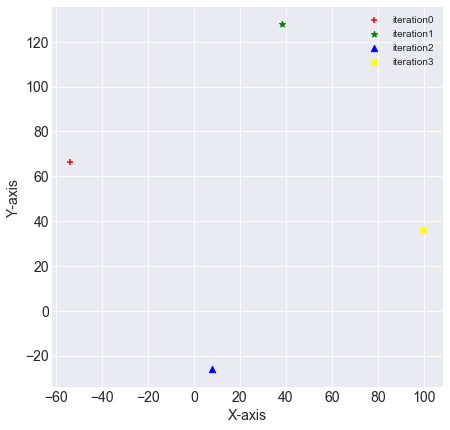

In [19]:
for y in range(count_queries):
    print(f"Enter the initial Query{(y + 1)}")
    query = input()
    list_query = do_preproceesing(query)
    print(f"\nEnter the ground truth folder for Query{(y + 1)}:")
    for a in range(len(files)):
        print(f"Enter {(a+1)} for {files[a]}")

    ground_sno = int(input())
    dict_ground_docs = {}
    ground_folder = files[ground_sno - 1]
    list_TSN_queries = []
    for b in dict_folder_docs[ground_folder]:
        dict_ground_docs[b] = 1
    
    total_relevant = len(dict_ground_docs)
    count_iteration = 0
    dict_already_marked = {}
    #Now for each of the queries running the iterations till the user wants to stop the iterations
    vector_query = make_vector_log(list_query)
    flag_feedback = 1
    while True:
        list_TSN_queries.append(vector_query.tolist())
        list_cosine_scores = find_similarity(vector_query)
        list_cosine_scores.sort(key = lambda x :x[1], reverse = True)
        
        list_relevant = []
        list_unrelevant = []
        #Calling the function defined above to plot PR curve
        print("The PR curve is:")
        plot_PR_curve(y)
        if count_iteration != 0:
            print("Enter 1 to continue feedback iterations and 2 to stop feedback iterations")
            flag_feedback = int(input())
            
            if flag_feedback == 2:
                print(f"The top {value_k} documents after {count_iteration} iteration are:")
                for e in range(value_k):
                    print(f"{e+1}. {curr_docum}")
                break
                
        print("Enter the value of p in p% to be marked as relevant")
        p_percent = int(input())
        
        #Now doing the relevance feedback process of marking p% docs as relevant
        count_p_percent = int((p_percent / 100) * value_k)
        count_marked = 0
        dict_mark_this_iteration = {}
        list_relevant_in_k = []
        list_non_rel_in_k = []
        for f in range(value_k):
            curr_dc = list_cosine_scores[f][0]
            #Now checking if the document belongs to the ground truth folder and 
            #it has not been marked relevant in the previous iterations
            if dict_already_marked.get(curr_dc) is None:
                #If part for docs belong to ground truth docs
                if dict_ground_docs.get(curr_dc) is not None:
                    dict_already_marked[curr_dc] = 1
                    dict_mark_this_iteration[curr_dc] = 1
                    list_relevant_in_k.append(curr_dc)
                    count_marked += 1
                else:
                    list_non_rel_in_k.append(curr_dc)
                    
            if count_marked == count_p_percent:
                break
        
        #Now there may be case that top p% are found before scanning whole list,
        #So finding remaining non-relevant docs
        if f < value_k:
            start_val = f - 1
            for gj in range(start_val, value_k):
                curr_dc = list_cosine_scores[gj][0]
                if dict_already_marked.get(curr_dc) is None:
                    list_non_rel_in_k.append(curr_dc)
                    
        #Now printing the top k documents
        if count_iteration == 0:
            print(f"The top {value_k} documents for initial query are:")
        else:
            print(f"The top {value_k} documents after {count_iteration} iteration are:")
        for e in range(value_k):
            curr_docum = list_cosine_scores[e][0]
            if dict_mark_this_iteration.get(curr_docum) is not None:
                print(f"{e+1}. {curr_docum}*")
            else:
                print(f"{e+1}. {curr_docum}")
        
        count_relevant_in_k = len(list_relevant_in_k)
        count_non_relevant_in_k = len(list_non_rel_in_k)
        #Now finding the updated query
        term1 = vector_query * value_alpha
        #Finding the sum of relevant doc vectors
        summation_rel_vectors = numpy.zeros(count_vocab)
        for h in list_relevant_in_k:
            c_dc = dict_matrix_vectors[h]
            vector_rel_doc = numpy.array(c_dc)
            summation_rel_vectors = numpy.add(summation_rel_vectors, vector_rel_doc)
        prd_val = value_beta / count_relevant_in_k
        term2 = summation_rel_vectors * prd_val
        
        #Finding the sum of non-relevant doc vectors
        summation_non_rel_vectors = numpy.zeros(count_vocab)
        for l in list_non_rel_in_k:
            c_dc_n = dict_matrix_vectors[l]
            vector_NR_in_k = numpy.array(c_dc_n)
            summation_non_rel_vectors = numpy.add(summation_non_rel_vectors, vector_NR_in_k)
        
        prd_val_2 = value_gamma / count_non_relevant_in_k
        term3 = summation_non_rel_vectors * prd_val_2 
        
        updated_query_vector = numpy.add(term1, term2)
        updated_query_vector = numpy.subtract(updated_query_vector, term3)
        vector_query = updated_query_vector
        count_iteration += 1
    #Caaling the function defined above to plot TSNE curve
    print(f"\nThe TSNE curve for Query {(y+1)} is: ")
    plot_TSNE(list_TSN_queries)
        

In [20]:
len_map_precision = [len(f) for f in list_map_value]
min_iterations = min(len_map_precision)
for r in range(min_iterations):
    list_mean_values = [li[r] for li in list_map_value]
    value_MAP = sum(list_mean_values) / count_queries
    if r == 0:
        print(f"The MAP value for the {count_queries} queries for initial query is iteration is {value_MAP}")
    else:
        print(f"The MAP value for the {count_queries} queries after {r+1} feedback iteration is {value_MAP}")

The MAP value for the 3 queries for initial query is iteration is 0.2784819254919398
The MAP value for the 3 queries after 2 feedback iteration is 0.7958636787307777
The MAP value for the 3 queries after 3 feedback iteration is 0.9238454611769202
The MAP value for the 3 queries after 4 feedback iteration is 0.960169698255303
